# EDA exploring for Inquiry and Prices dataset


## Import necassary libraries

In [10]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [11]:
#Load datasets
df_merged_IP = pd.read_csv('../data/merged_inquiries_and_prices.csv')

In [12]:
df_merged_IP.head()

,Unnamed: 0,listing_id,title_x,date,time_x,adult_count_x,children_count_x,pets_count_x,arrival_date_x,departure_date_x,inquiry_price_x,length_stay_x,min_days,date_from,date_to,filled_in_price_per_day,filled_in_price_per_week,month,price_catagory
0,0,b334776d-0cf1-51f1-8cdc-37535b280f3d,Anfrage,2019-01-01 00:00:00,2021-07-20 00:07:31,6.0,2.0,0.0,2019-07-24 00:00:00,2019-07-31 00:00:00,1601.0,7,7.0,2019-06-14 00:00:00,2019-09-01 00:00:00,188.0,1316.0,2019-06,Both
1,2,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01 00:00:00,2021-07-20 00:24:34,2.0,1.0,0.0,2019-10-13 00:00:00,2019-10-20 00:00:00,0.0,7,2.0,2019-09-27 00:00:00,2019-10-13 00:00:00,75.0,500.0,2019-09,Both
2,3,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01 00:00:00,2021-07-20 00:24:34,2.0,1.0,0.0,2019-10-13 00:00:00,2019-10-20 00:00:00,0.0,7,2.0,2019-10-13 00:00:00,2019-10-28 00:00:00,75.0,500.0,2019-10,Both
3,5,202306bf-f261-5975-8356-11719a53a063,Anfrage,2019-01-01 00:00:00,2021-07-20 01:06:48,2.0,0.0,0.0,2019-04-30 00:00:00,2019-05-03 00:00:00,237.0,3,3.0,2018-09-30 00:00:00,2019-06-01 00:00:00,79.0,553.0,2018-09,Day
4,11,afcd1d75-762c-59e0-b59a-70bd6432cd8d,Anfrage,2019-01-01 00:00:00,2021-07-20 03:30:20,2.0,1.0,0.0,2019-07-06 00:00:00,2019-07-14 00:00:00,705.0,8,3.0,2019-07-06 00:00:00,2019-07-07 00:00:00,105.0,735.0,2019-07,Day


## Correcting date and time formatting.

In [13]:
df_merged_IP['date_from'] = pd.to_datetime(df_merged_IP['date_from'], errors = 'coerce')
df_merged_IP['date_to'] = pd.to_datetime(df_merged_IP['date_to'], errors = 'coerce')
df_merged_IP['date'] = pd.to_datetime(df_merged_IP['time_x'], errors = 'coerce')
df_merged_IP['time_x'] = pd.to_datetime(df_merged_IP['date'], errors = 'coerce')
df_merged_IP['arrival_date_x'] = pd.to_datetime(df_merged_IP['arrival_date_x'], errors = 'coerce')
df_merged_IP['departure_date_x'] = pd.to_datetime(df_merged_IP['departure_date_x'], errors = 'coerce')

## Deleting redundant column

In [21]:
del df_merged_IP['Unnamed: 0']

## Descriptive statistics

In [22]:
df_merged_IP.describe()

,adult_count_x,children_count_x,pets_count_x,inquiry_price_x,length_stay_x,min_days,filled_in_price_per_day,filled_in_price_per_week
count,1.111426e+06,1.111426e+06,1.111426e+06,1.111426e+06,1.111426e+06,1.111426e+06,1.111426e+06,1.111426e+06
mean,2.738881e+00,3.173536e-01,1.203832e-01,6.253430e+02,6.681006e+00,3.882130e+00,8.562572e+01,5.912741e+02
std,1.120436e+00,6.591467e-01,3.254092e-01,3.746130e+02,3.050047e+00,2.178611e+00,3.449720e+01,2.380342e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,7.000000e-02
25%,2.000000e+00,0.000000e+00,0.000000e+00,3.440000e+02,4.000000e+00,2.000000e+00,6.000000e+01,4.200000e+02
50%,2.000000e+00,0.000000e+00,0.000000e+00,5.520000e+02,7.000000e+00,4.000000e+00,8.000000e+01,5.600000e+02
75%,4.000000e+00,0.000000e+00,0.000000e+00,8.300000e+02,7.000000e+00,6.000000e+00,1.008571e+02,7.000000e+02
max,6.000000e+00,2.000000e+00,1.000000e+00,1.820000e+03,1.400000e+01,2.800000e+01,2.200000e+02,1.540000e+03


In [23]:
df_merged_IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111426 entries, 0 to 1111425
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   listing_id                1111426 non-null  object        
 1   title_x                   1111426 non-null  object        
 2   date                      1111426 non-null  datetime64[ns]
 3   time_x                    1111426 non-null  datetime64[ns]
 4   adult_count_x             1111426 non-null  float64       
 5   children_count_x          1111426 non-null  float64       
 6   pets_count_x              1111426 non-null  float64       
 7   arrival_date_x            1111426 non-null  datetime64[ns]
 8   departure_date_x          1111426 non-null  datetime64[ns]
 9   inquiry_price_x           1111426 non-null  float64       
 10  length_stay_x             1111426 non-null  int64         
 11  min_days                  1111426 non-null  float6

[Text(0.5, 0, 'adult_count_x'),
 Text(1.5, 0, 'children_count_x'),
 Text(2.5, 0, 'pets_count_x'),
 Text(3.5, 0, 'inquiry_price_x'),
 Text(4.5, 0, 'length_stay_x'),
 Text(5.5, 0, 'min_days'),
 Text(6.5, 0, 'filled_in_price_per_day'),
 Text(7.5, 0, 'filled_in_price_per_week')]

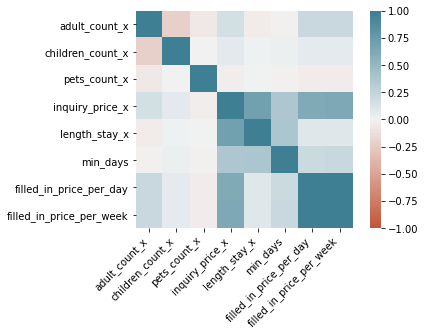

In [24]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_merged_IP.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

## Modelling 